У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import numpy as np
import pandas as pd

In [5]:
from matplotlib import pyplot as plt

In [8]:
%matplotlib inline

In [11]:
import os
os.listdir()

['hw_4_5_Візуалізація_з_seaborn.ipynb',
 'figure_2.png',
 'figure_3.png',
 'figure_1.png',
 'my_figure.png',
 'hw_4_3_Робота_з_DataFrame_Діаграма_розсіювання.ipynb',
 'Lecture_4_Data_Visualisation.ipynb',
 'hw_4_1_Базові_візуалізації.ipynb',
 '.ipynb_checkpoints',
 'hw_4_2_Базові_візуалізації_Продовження.ipynb',
 'hw_4_4_Візуалізація_з_pandas.ipynb']

In [14]:
os.listdir('../data/')

['.DS_Store',
 'health_insurance_cross_sell_prediction.csv',
 'yulu_rental.csv',
 'supermarket_sales.csv']

In [17]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
import seaborn as sns

In [21]:
print(sns.__version__)

0.13.2


In [24]:
sns.set_theme()

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

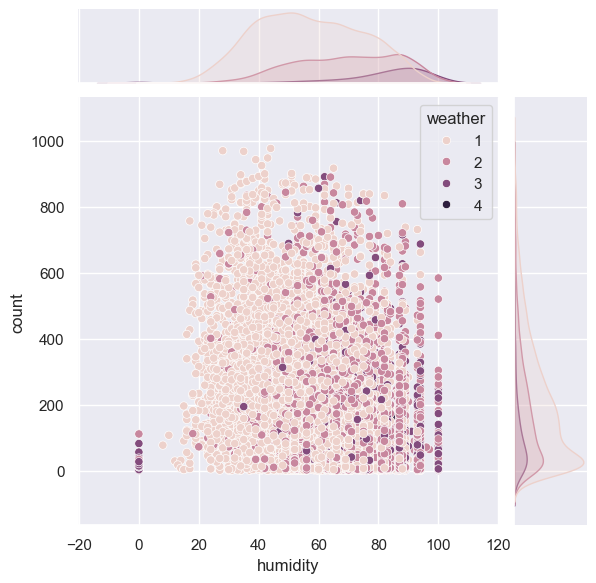

In [27]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");
plt.show()

в значеннях коли вологість рівня 0 та 100 є напевно виключенням, аномалією яку треба дослідити додатково.
бачимо залежність(пряму кореляцію) між погодою - ясно, вологістю 20-60 і кількістю зареєстрованих користувачів. Треба додаткові дослідження, але вже простежується пряма залежність від сезону/погодних умов.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [35]:
# Фільтруємо дані за значеннями 1 (весна) та 2 (літо) у стовпці season
spring_summer_data = df[df['season'].isin([1, 2])] #Метод isin перевіряє, чи значення у стовпці season входять до заданого списку [1, 2].
spring_summer_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


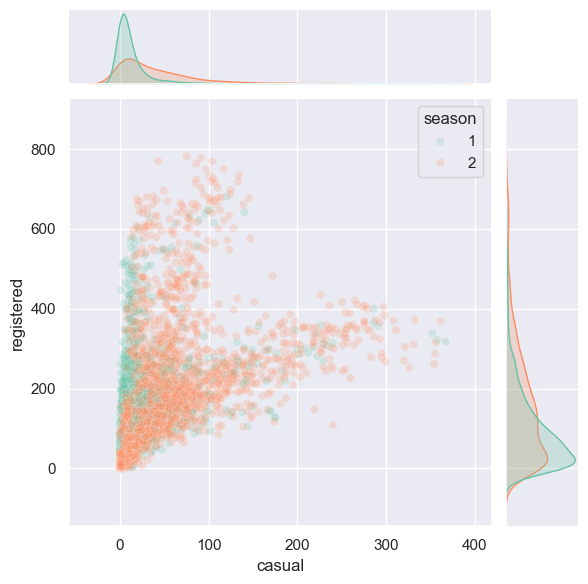

In [39]:
sns.jointplot(data=spring_summer_data, x="casual", y="registered", hue="season", alpha=0.2, palette="Set2");
plt.show()

Аналізуючи цю візуалізацію, можна стверджувати що влітку користування послугами компанії Yulu є більш стихійним, ситуативним.
Весною кількість (хочеться сказати - "щільність") зареєстрованих користувачів більше. Таке спостереження дозволяє нам весною більш прогнозувати результат діяльності, а влітку можна додатково підсилити маркетингову стратегію, щоб епізодичні користувачі ("casual") конвертувалися "registered", зареєстрованих юзерів легше "утримати" та конвертувати у постійного покупця.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


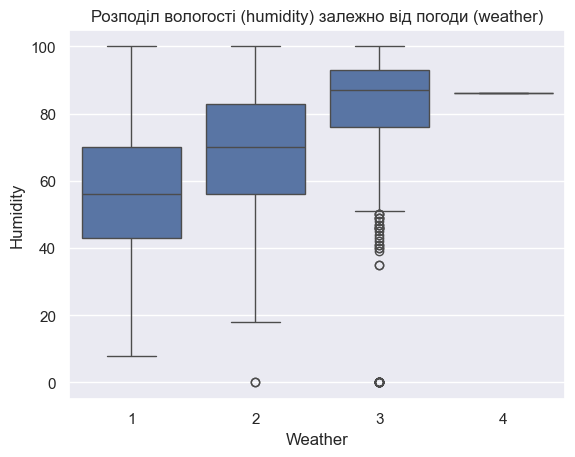

In [52]:
# Побудова box plot
sns.boxplot(data=df, x="weather", y="humidity")

# Додаткове форматування
plt.title("Розподіл вологості (humidity) залежно від погоди (weather)")
plt.xlabel("Weather")
plt.ylabel("Humidity")
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


Аналізуючи медіанні значення, можемо сказати, що кількість данних у датафреймі восени більше половини це 87% вологості і нижче, влітку і весною дані більш збалансовані. 
Восени більше вкидів у датафреймі. Взимку даних недостатньо для візуального аналізу. 
весною: 25персентиль вологість:44, 75-ий 70.
влітку: 25персентиль вологість:58, 75-ий 82.

4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [60]:
df_2 = ['casual', 'registered', 'count', 'workingday']
filtered_data = df[df_2]
filtered_data

,casual,registered,count,workingday
0,3,13,16,0
1,8,32,40,0
2,5,27,32,0
3,3,10,13,0
4,0,1,1,0
...,...,...,...,...
10881,7,329,336,1
10882,10,231,241,1
10883,4,164,168,1
10884,12,117,129,1


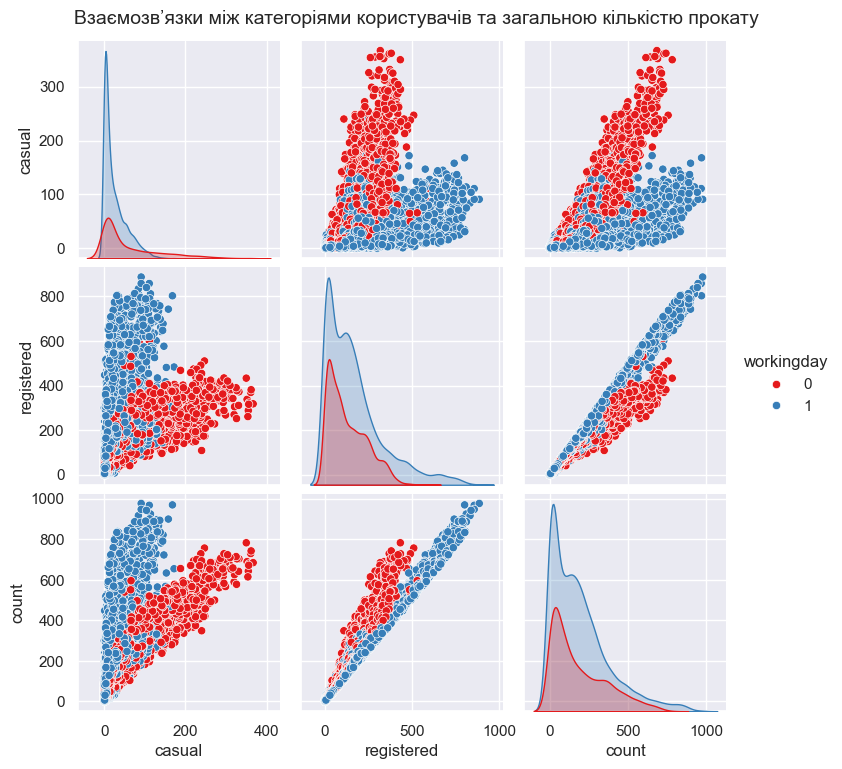

In [76]:
# Побудова парних графіків
sns.pairplot(data=filtered_data,  
             hue='workingday', 
             palette='Set1') 
             
plt.suptitle('Взаємозв’язки між категоріями користувачів та загальною кількістю прокату', 
             y=1.02, fontsize=14)
plt.show()

Зареєстровані користувачі більше користуються прокатом у робочі дні, тоді як сasual — у святкові.
Загальна кількість прокатів змінюється залежно від типу дня, і ця зміна може бути врахована при прийнятті рішень щодо маркетингових стратегій та управління запасами велосипедів та сервісу обслуговування.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [79]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [84]:
df['date'] = df.datetime.dt.date
df.datetime.dt.date

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: datetime, Length: 10886, dtype: object

In [86]:
df_viz = df[['date', 'registered', 'casual']]
df_viz

,date,registered,casual
0,2011-01-01,13,3
1,2011-01-01,32,8
2,2011-01-01,27,5
3,2011-01-01,10,3
4,2011-01-01,1,0
...,...,...,...
10881,2012-12-19,329,7
10882,2012-12-19,231,10
10883,2012-12-19,164,4
10884,2012-12-19,117,12


In [89]:
#групуємо дані за колонкою date та обчислюємо суму кількості зареєстрованих і казуальних користувачів за кожен день.

df_viz = df_viz.groupby('date').sum()
df_viz

,registered,casual
date,,
2011-01-01,654,331
2011-01-02,670,131
2011-01-03,1229,120
2011-01-04,1454,108
2011-01-05,1518,82
...,...,...
2012-12-15,4280,767
2012-12-16,3248,538
2012-12-17,4373,212


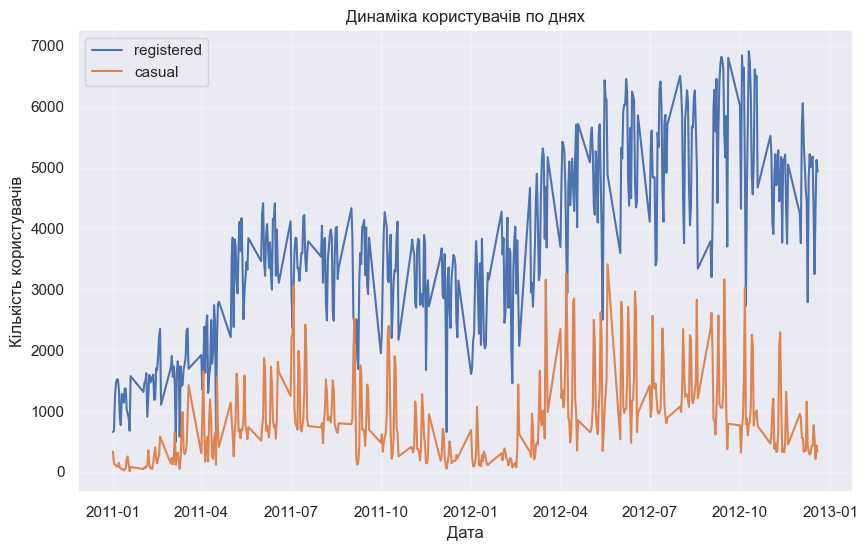

In [97]:
df_viz.plot(y=['registered', 'casual'], figsize=(10,6))
plt.title('Динаміка користувачів по днях')
plt.xlabel('Дата')
plt.ylabel('Кількість користувачів')
plt.grid(axis ='both', alpha=.3)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
